In [1]:
import numpy as np

In [258]:
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float,curLine) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat
#计算距离
def calDist(vect1,vect2):
    return np.sqrt(np.sum(np.power((vect1-vect2),2)))

#构建簇质心
def randCenter(dataset,k):
    randCen=np.mat(np.zeros((k,dataset.shape[1])))
    minVal=np.min(dataset,axis=0)
    maxVal=np.max(dataset,axis=0)
    randCen=np.tile(minVal,(k,1))+np.multiply(np.random.rand(k,dataset.shape[1]),np.tile((maxVal-minVal),(k,1)))
    return randCen


In [259]:
dataMat=np.mat(loadDataSet('testSet.txt'))
print(randCenter(dataMat,4)),[np.min(dataMat,axis=0),np.max(dataMat,axis=0)]

[[-1.62579514 -2.60794176]
 [-2.32693383 -0.69100796]
 [-2.22828246 -2.62948582]
 [-2.90539154 -2.62640924]] [matrix([[-5.379713, -4.232586]]), matrix([[ 4.838138,  5.1904  ]])]


In [314]:
#k-means算法,返回簇中心和分配结果
def kmeans(dataSet,k,distway=calDist,centerway=randCenter):
    m,n=np.shape(dataSet)
    #初始化簇中心
    centroPoint=centerway(dataSet,k)
    #聚类结果第一列代表类别第二列代表距离
    clusterRe=np.mat(np.zeros((m,2)))
    isChanged=True
    while(isChanged):
        isChanged=False
        for i in range(m):
            mindist=np.inf
            minindex=-1
            for j in range(k):
                distJ=distway(dataSet[i,:],centroPoint[j,:])
                if distJ<mindist:
                    minindex=j
                    mindist=distJ
            if clusterRe[i,0]!=minindex:
                isChanged=True
            clusterRe[i,0]=minindex
            clusterRe[i,1]=mindist**2
        for i in range(k):
            centroPoint[i,:]=np.mean(dataSet[np.where(clusterRe[:,0]==i)[0],:],axis=0)
        print centroPoint
    return centroPoint,clusterRe

In [261]:
myCentropoint,myCluster=kmeans(dataMat,4)

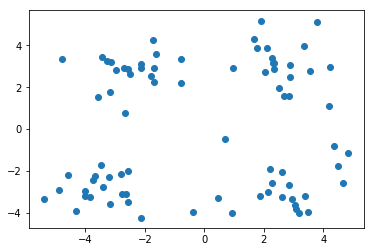

In [262]:
from matplotlib import pyplot as plt
plt.scatter(dataMat[:,0].tolist(),dataMat[:,1].tolist())
plt.show()

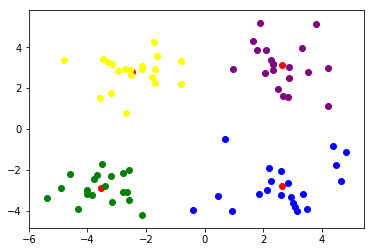

In [263]:
def drawRe(myCentropoint,myCluster,dataMat):
    plt.scatter(myCentropoint[:,0].tolist(),myCentropoint[:,1].tolist(),c='red')
    for i in range(4):
        clusterData=dataMat[np.where(myCluster[:,0]==i)[0],:]
        if i==0:
            plt.scatter(clusterData[:,0].tolist(),clusterData[:,1].tolist(),c='yellow')
        if i==1:
            plt.scatter(clusterData[:,0].tolist(),clusterData[:,1].tolist(),c='blue')
        if i==2:
            plt.scatter(clusterData[:,0].tolist(),clusterData[:,1].tolist(),c='green')
        if i==3:
            plt.scatter(clusterData[:,0].tolist(),clusterData[:,1].tolist(),c='purple')
    plt.show()
drawRe(myCentropoint,myCluster,dataMat)

In [317]:
#二分k-means算法
def bikmeans(dataSet,k,distway=calDist):
    #将所有点看成一个簇计算簇的中心
    m,n=dataSet.shape
    clusterRe=np.mat(np.zeros((m,2)))
    pointList=[]
    centropoint0=np.mean(dataSet,axis=0).tolist()[0]
    pointList.append(centropoint0)
    #计算总误差
    for i in range(m):
        clusterRe[i,:]=0,distway(np.mat(centropoint0),dataSet[i,:])**2
    num=1
    while num<k:
        minSSE=np.inf
        bestsplitindex=-1
        for i in range(len(pointList)):
            clusterData=dataSet[np.where(clusterRe[:,0]==i)[0],:]
            #根据k-means k=2情况下进行分类
            tempCentropoint,tempCluster=kmeans(clusterData,2)
            #计算SSE的缩减情况
            SSE_old=np.sum(clusterRe[np.where(clusterRe[:,0]==i)[0],1])
            SSE_new=np.sum(tempCluster[:,1])
            if (SSE_new-SSE_old)<minSSE:
                bestsplitindex=i
                minSSE=SSE_new-SSE_old
        #选取最佳分割簇
        bestclusterData=dataSet[np.where(clusterRe[:,0]==bestsplitindex)[0],:]
        Centropoint_new,Cluster_new=kmeans(bestclusterData,2)
        pointList[bestsplitindex]=Centropoint_new[0,:].tolist()[0]
        pointList.append(Centropoint_new[1,:].tolist()[0])
        tempindex=-1
        #更新clusterRe主要要对其类别号同时进行更新
        for i in range(m):
            #聚类里面的下标
            if clusterRe[i,0]==bestsplitindex:
                tempindex+=1
                if int(Cluster_new[tempindex,0])==0:
                    clusterRe[i,1]=Cluster_new[tempindex,1]
                if int(Cluster_new[tempindex,0])==1:
                    clusterRe[i,:]=num,Cluster_new[tempindex,1]
        num+=1
    return np.mat(pointList),clusterRe

[[ 0.82422407 -1.11943428]
 [-1.07631816  3.41881939]]
[[ 0.30368272 -1.853273  ]
 [-0.48729809  3.42433234]]
[[-0.32150057 -2.62473743]
 [-0.06953469  3.29844341]]
[[-0.45965615 -2.7782156 ]
 [-0.00675605  3.22710297]]
[[-0.45965615 -2.7782156 ]
 [-0.00675605  3.22710297]]
[[-2.29791497  1.10498216]
 [ 2.13006893  1.35397793]]
[[-2.11802947  0.88737776]
 [ 2.40575527  1.66726781]]
[[-1.70351595  0.27408125]
 [ 2.93386365  3.12782785]]
[[-1.70351595  0.27408125]
 [ 2.93386365  3.12782785]]
[[-1.0545834  -3.3579066 ]
 [-1.7962206   0.79293666]]
[[-0.36852161 -2.96793856]
 [-2.79578405  2.92664291]]
[[-0.45965615 -2.7782156 ]
 [-2.94737575  3.3263781 ]]
[[-0.45965615 -2.7782156 ]
 [-2.94737575  3.3263781 ]]
[[ 2.7674964  2.4361338]
 [ 3.1002309  3.8195219]]
[[ 2.66598045  2.52444636]
 [ 3.26127644  3.86529411]]
[[ 2.598185    2.60968842]
 [ 3.43738162  3.905037  ]]
[[ 2.598185    2.60968842]
 [ 3.43738162  3.905037  ]]
[[-0.97166321 -1.96674883]
 [-2.80129506  3.63532638]]
[[-0.45965615 

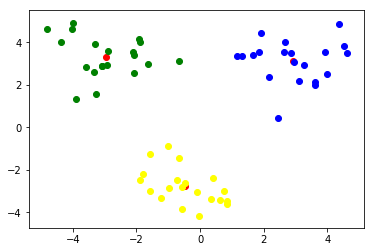

In [318]:
dataMat2=np.mat(loadDataSet('testSet2.txt'))
mycentroPoint2,myClusterRe2=bikmeans(dataMat2,3)
drawRe(mycentroPoint2,myClusterRe2,dataMat2)